In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import pandas as pd
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
dataset = r"Image_data"
Yes_path = r"Image_data\1"
No_path = r"Image_data\0"

(50, 50, 3)


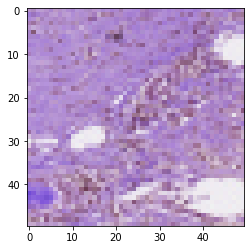

In [3]:
img = cv2.imread(Yes_path+'\9023_idx5_x1301_y1351_class1.png')
print(img.shape)
plt.imshow(img)

In [4]:
vals = [Yes_path, No_path]
print(os.listdir(vals[0]).__len__())
print(os.listdir(vals[1]).__len__())

288
583


In [5]:
pathdir = [Yes_path, No_path]
classes = ['Yes', 'No']
filepaths = []
labels = []
for i, j in zip(pathdir, classes):
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())

['9023_idx5_x1301_y1351_class1.png', '9023_idx5_x1301_y1401_class1.png', '9023_idx5_x1301_y1451_class1.png', '9023_idx5_x1301_y1501_class1.png', '9023_idx5_x1301_y1551_class1.png', '9023_idx5_x1301_y1601_class1.png', '9023_idx5_x1301_y1651_class1.png', '9023_idx5_x1301_y1751_class1.png', '9023_idx5_x1301_y1801_class1.png', '9023_idx5_x1301_y1851_class1.png', '9023_idx5_x1301_y1901_class1.png', '9023_idx5_x1301_y1951_class1.png', '9023_idx5_x1351_y1301_class1.png', '9023_idx5_x1351_y1351_class1.png', '9023_idx5_x1351_y1401_class1.png', '9023_idx5_x1351_y1451_class1.png', '9023_idx5_x1351_y1501_class1.png', '9023_idx5_x1351_y1551_class1.png', '9023_idx5_x1351_y1601_class1.png', '9023_idx5_x1351_y1651_class1.png', '9023_idx5_x1351_y1701_class1.png', '9023_idx5_x1351_y1751_class1.png', '9023_idx5_x1351_y1801_class1.png', '9023_idx5_x1351_y1851_class1.png', '9023_idx5_x1351_y1901_class1.png', '9023_idx5_x1351_y1951_class1.png', '9023_idx5_x1351_y2001_class1.png', '9023_idx5_x1351_y2051_clas

In [6]:
dataset = list(zip(filepaths, labels))
pathframe = pd.DataFrame(dataset, columns=['filepaths', 'labels'])

In [7]:
pathframe.__len__()
pathframe.tail()

,filepaths,labels
866,Image_data\0\9023_idx5_x951_y751_class0.png,No
867,Image_data\0\9023_idx5_x951_y801_class0.png,No
868,Image_data\0\9023_idx5_x951_y851_class0.png,No
869,Image_data\0\9023_idx5_x951_y901_class0.png,No
870,Image_data\0\9023_idx5_x951_y951_class0.png,No


In [8]:
print(pathframe['labels'].value_counts())

No     583
Yes    288
Name: labels, dtype: int64


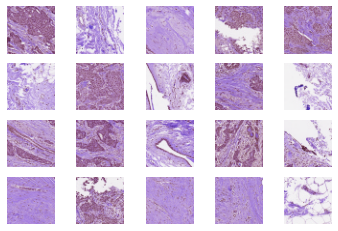

In [9]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(pathframe.filepaths[vals]))
    plt.axis('off')
plt.show()

In [10]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=0)
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(783, 2) (88, 2) (704, 2) (79, 2)


In [11]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 30 , width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                  zoom_range=0.2, horizontal_flip = True, vertical_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [12]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(50,50), class_mode = 'binary', shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(50,50), class_mode = 'binary', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(50,50), class_mode = 'binary', shuffle=False)

Found 704 validated image filenames belonging to 2 classes.
Found 79 validated image filenames belonging to 2 classes.
Found 88 validated image filenames belonging to 2 classes.


{'No': 0, 'Yes': 1}
(16, 50, 50, 3)


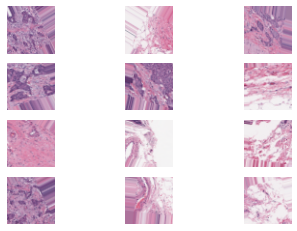

In [13]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)

for i in range(0, 12):
    val = train_gen[0][0][i]
    plt.subplot(4,3,i+1)
    plt.imshow(val)
    plt.axis('off')
plt.show()

In [14]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape= (150,150,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [15]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2, min_delta= 0.01)

In [16]:
model.compile(loss='binary_crossentropy', optimizer= Adam(lr=0.01), metrics=['accuracy'])
model.fit(train_gen, validation_data= valid_gen, epochs=16, verbose=1)

C:\Users\Sukhendu Mondal\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/16
44/44 [==============================] - 62s 874ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 2/16
44/44 [==============================] - 17s 383ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 3/16
44/44 [==============================] - 17s 375ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 4/16
44/44 [==============================] - 17s 376ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 5/16
44/44 [==============================] - 17s 377ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 6/16
44/44 [==============================] - 17s 378ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 7/16
44/44 [==============================] - 16s 372ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 8/16
44/44 [=======================

In [17]:
model.evaluate(test_gen)

6/6 [==============================] - 2s 470ms/step - loss: nan - accuracy: 0.6591


[nan, 0.6590909361839294]

# TCR Innovation Project by Sukhendu Mondal